# PS2 

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from itertools import product

In [94]:
def three_d_plot(x_list, y_list, z_list, label_list, dim_list):
    # From: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
    # https://stackoverflow.com/questions/8722735/i-want-to-use-matplotlib-to-make-a-3d-plot-given-a-z-function#8723033
    fig = plt.figure(figsize = (dim_list[2], dim_list[3]))
    ax = fig.gca(projection='3d')

    # Make data.
    X, Y = np.meshgrid(np.array(x_list), np.array(y_list))
    Z = np.array([z_list])

    # Plot the surface.
    ax.plot_surface(X, Y, Z,
                           linewidth=0, antialiased=False)
    ax.set_xlabel(label_list[0])
    ax.set_ylabel(label_list[1])
    ax.set_zlabel(label_list[2])
    plt.title(label_list[3])
    ax.view_init(dim_list[0], dim_list[1])

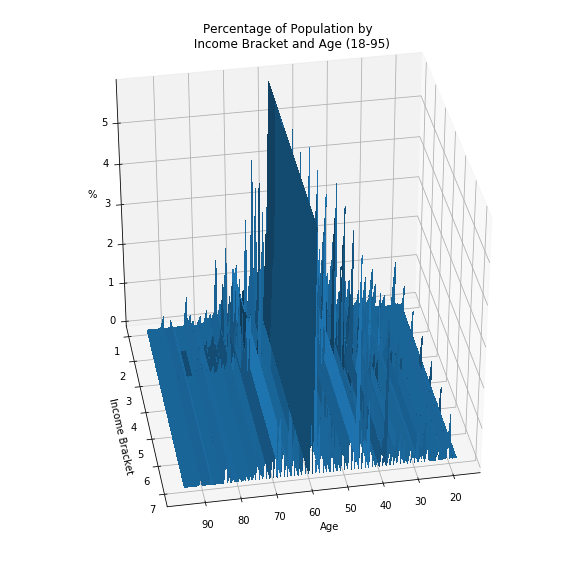

In [104]:
data = np.loadtxt("https://raw.githubusercontent.com/UC-MACSS/persp-research_Spr18/master/assignments/PS2/data/BQmat_orig.txt",
                 delimiter = ',')
age = []
income = []
count = []
income_brackets = [0.25, 0.25, 0.20, 0.10, 0.10, 0.09, 0.01]

combos = product(np.arange(0,78), np.arange(0,7))
for i, j in combos:
    age.append(i+18) # correct offset
    income.append(j+1) # correct offset
    count.append(data[i][j] * 100) # transform into percent

labs = ["Age", "Income Bracket", "%", "Percentage of Population by \n Income Bracket and Age (18-95)"]
dims = [35, 80, 10, 10]

three_d_plot(age, income, count, labs, dims)
plt.savefig("incomevsage3dsurface.png")